In [96]:
import numpy as np
import robosuite as suite

from PIL import Image
from IPython.display import display
import imageio
from robosuite.utils.transform_utils import *
from robosuite.utils.placement_samplers import UniformRandomSampler
from robosuite.utils.mjcf_utils import CustomMaterial
from robosuite.models.objects import BoxObject

np.set_printoptions(precision=3, suppress=True) 

In [97]:
table_offset=np.array((0, 0, 0.95))

In [181]:
# initialize objects of interest
tex_attrib = {
    "type": "cube",
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
redwood = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)


cube = BoxObject(
    name="cube",
    size_min=[0.020, 0.020, 0.020],  # [0.015, 0.015, 0.015],
    size_max=[0.022, 0.022, 0.022],  # [0.018, 0.018, 0.018])
    rgba=[1, 0, 0, 1],
    material=redwood,
)


placement_initializer = UniformRandomSampler(
                name="ObjectSampler",
                mujoco_objects= cube,
                x_range=[0.01, 0.01],
                y_range=[0.06, 0.06],
                rotation=0,
                ensure_object_boundary_in_range=False,
                ensure_valid_placement=True,
                reference_pos= table_offset,
                z_offset=0.01,
            )

In [182]:
env = suite.make(
    env_name="Lift",
    robots="Sawyer",
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names="frontview",
    # table_full_size=(0.8, 0.8, 0.2)
    table_offset=np.array((0, 0, 0.96)),
    placement_initializer=placement_initializer,
)

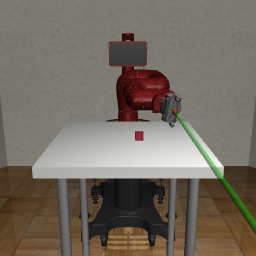

In [183]:
# set the arm to its zero position (all joint position = 0)
n=7
env.robots[0].set_robot_joint_positions(np.zeros(n))
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
display(Image.fromarray(frontview))

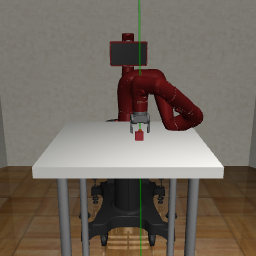

In [184]:
pos=data[-1]
env.robots[0].set_robot_joint_positions(pos)
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
display(Image.fromarray(frontview))

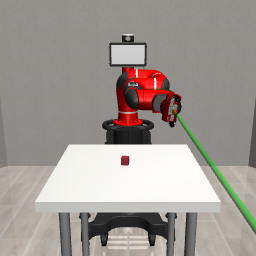

In [3]:
# set the arm to its zero position (all joint position = 0)
n=7
env.robots[0].set_robot_joint_positions(np.zeros(n))
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
display(Image.fromarray(frontview))

In [51]:
pos=data[0]
env.robots[0].set_robot_joint_positions(pos)

In [52]:
writer = imageio.get_writer("hello_sawyer.mp4", fps=20)
# env.reset()
 
action = np.zeros(8)
for i in range(1, 100+10):
    
    if i %50==0:
        action[-1] = 0.5  #close. 
    elif i %25==0:
        action[-1] = -0.5
        
    env.step(action)

    frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
    agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
    #wrist camera
    wristview = env.sim.render(height=256, width=256, camera_name="robot0_eye_in_hand")[::-1]
    # view=np.concatenate((frontview, agentview), axis=1)
    view=np.concatenate((frontview, wristview), axis=1)
    img=Image.fromarray(view)
    # img=Image.fromarray(frontview)
    writer.append_data(view)

writer.close()

In [42]:
pos 

array([ 0.139,  0.214, -2.389,  1.31 , -1.022, -2.276, -2.282])

### load real sawyer demo and play on sim

In [50]:
fn='/home/ns/wreg/matlab/sawyer_experiments/jps.csv'
fn='/home/ns/wreg/matlab/sawyer_experiments/jps2.csv'
fn='/home/ns/wreg/matlab/sawyer_experiments/jps3.csv'

#read csv using numpy
import numpy as np
data=np.genfromtxt(fn,delimiter=',',skip_header=1)[:, 1:8]

data=data[::-1] #weired reason
data.shape

(83, 7)

In [5]:
data[0]

array([ 0.139,  0.214, -2.389,  1.31 , -1.022, -2.276, -2.282])

In [6]:
data[-1]

array([ 0.198,  0.733, -2.371,  1.542, -0.604, -2.091, -2.228])

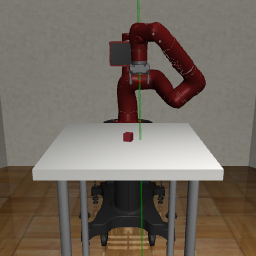

In [16]:
pos=data[0]
env.robots[0].set_robot_joint_positions(pos)
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
display(Image.fromarray(frontview))

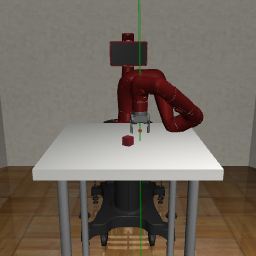

In [109]:
pos=data[-1]
env.robots[0].set_robot_joint_positions(pos)
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
display(Image.fromarray(frontview))

In [15]:
# camera" names = ('frontview', 'birdview', 'agentview', 'sideview', 'robot0_robotview', 'robot0_eye_in_hand'

In [17]:
writer = imageio.get_writer("hello_sawyer.mp4", fps=20)

for pos in data:
    env.robots[0].set_robot_joint_positions(pos)
    frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
    agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
    #wrist camera
    wristview = env.sim.render(height=256, width=256, camera_name="robot0_eye_in_hand")[::-1]
    # view=np.concatenate((frontview, agentview), axis=1)
    view=np.concatenate((frontview, wristview), axis=1)
    img=Image.fromarray(view)
    # img=Image.fromarray(frontview)
    writer.append_data(view)

writer.close()

In [19]:
pos

array([ 0.198,  0.733, -2.371,  1.542, -0.604, -2.091, -2.228])

In [187]:
# env.placement_initializer.sample(reference=[-0.6,0.5,0])
env.reset()
pass 

In [188]:
writer = imageio.get_writer("hello_sawyer.mp4", fps=20)


pos=data[0]
env.robots[0].set_robot_joint_positions(pos)

# action = np.zeros(8)
# for i in range(10):
#     action[-1] = -0.5  #open
#     env.step(action)

for pos in data:
    env.robots[0].set_robot_joint_positions(pos)
    frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
    agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
    #wrist camera
    wristview = env.sim.render(height=256, width=256, camera_name="robot0_eye_in_hand")[::-1]
    # view=np.concatenate((frontview, agentview), axis=1)
    view=np.concatenate((frontview, wristview), axis=1)
    img=Image.fromarray(view)
    # img=Image.fromarray(frontview)
    writer.append_data(view)

action = np.zeros(8)
for i in range(10):
    # action[-1] = 0.1  #close
    env.step(action)
    frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
    agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
    #wrist camera
    wristview = env.sim.render(height=256, width=256, camera_name="robot0_eye_in_hand")[::-1]
    # view=np.concatenate((frontview, agentview), axis=1)
    view=np.concatenate((frontview, wristview), axis=1)
    img=Image.fromarray(view)
    # img=Image.fromarray(frontview)
    writer.append_data(view)


for pos in data[::-1][10:]:
    env.robots[0].set_robot_joint_positions(pos)
    frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
    agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
    #wrist camera
    wristview = env.sim.render(height=256, width=256, camera_name="robot0_eye_in_hand")[::-1]
    # view=np.concatenate((frontview, agentview), axis=1)
    view=np.concatenate((frontview, wristview), axis=1)
    img=Image.fromarray(view)
    # img=Image.fromarray(frontview)
    writer.append_data(view)


writer.close()

In [75]:
env.placement_initializer.x_range=[0, 0]
env.placement_initializer.y_range=[0, 0]

In [85]:
env.placement_initializer.sample(reference=[0.1,0,0])

{'cube': ((0.1, 0.0, 0.03002861671057471),
  array([-0.189,  0.   ,  0.   ,  0.982]),
  <robosuite.models.objects.primitive.box.BoxObject at 0x7effca0c7350>)}

In [81]:
env.placement_initializer.sample()

{'cube': ((0.0, 0.0, 0.9800286167105747),
  array([-0.075,  0.   ,  0.   ,  0.997]),
  <robosuite.models.objects.primitive.box.BoxObject at 0x7effca0c7350>)}